## **A\***

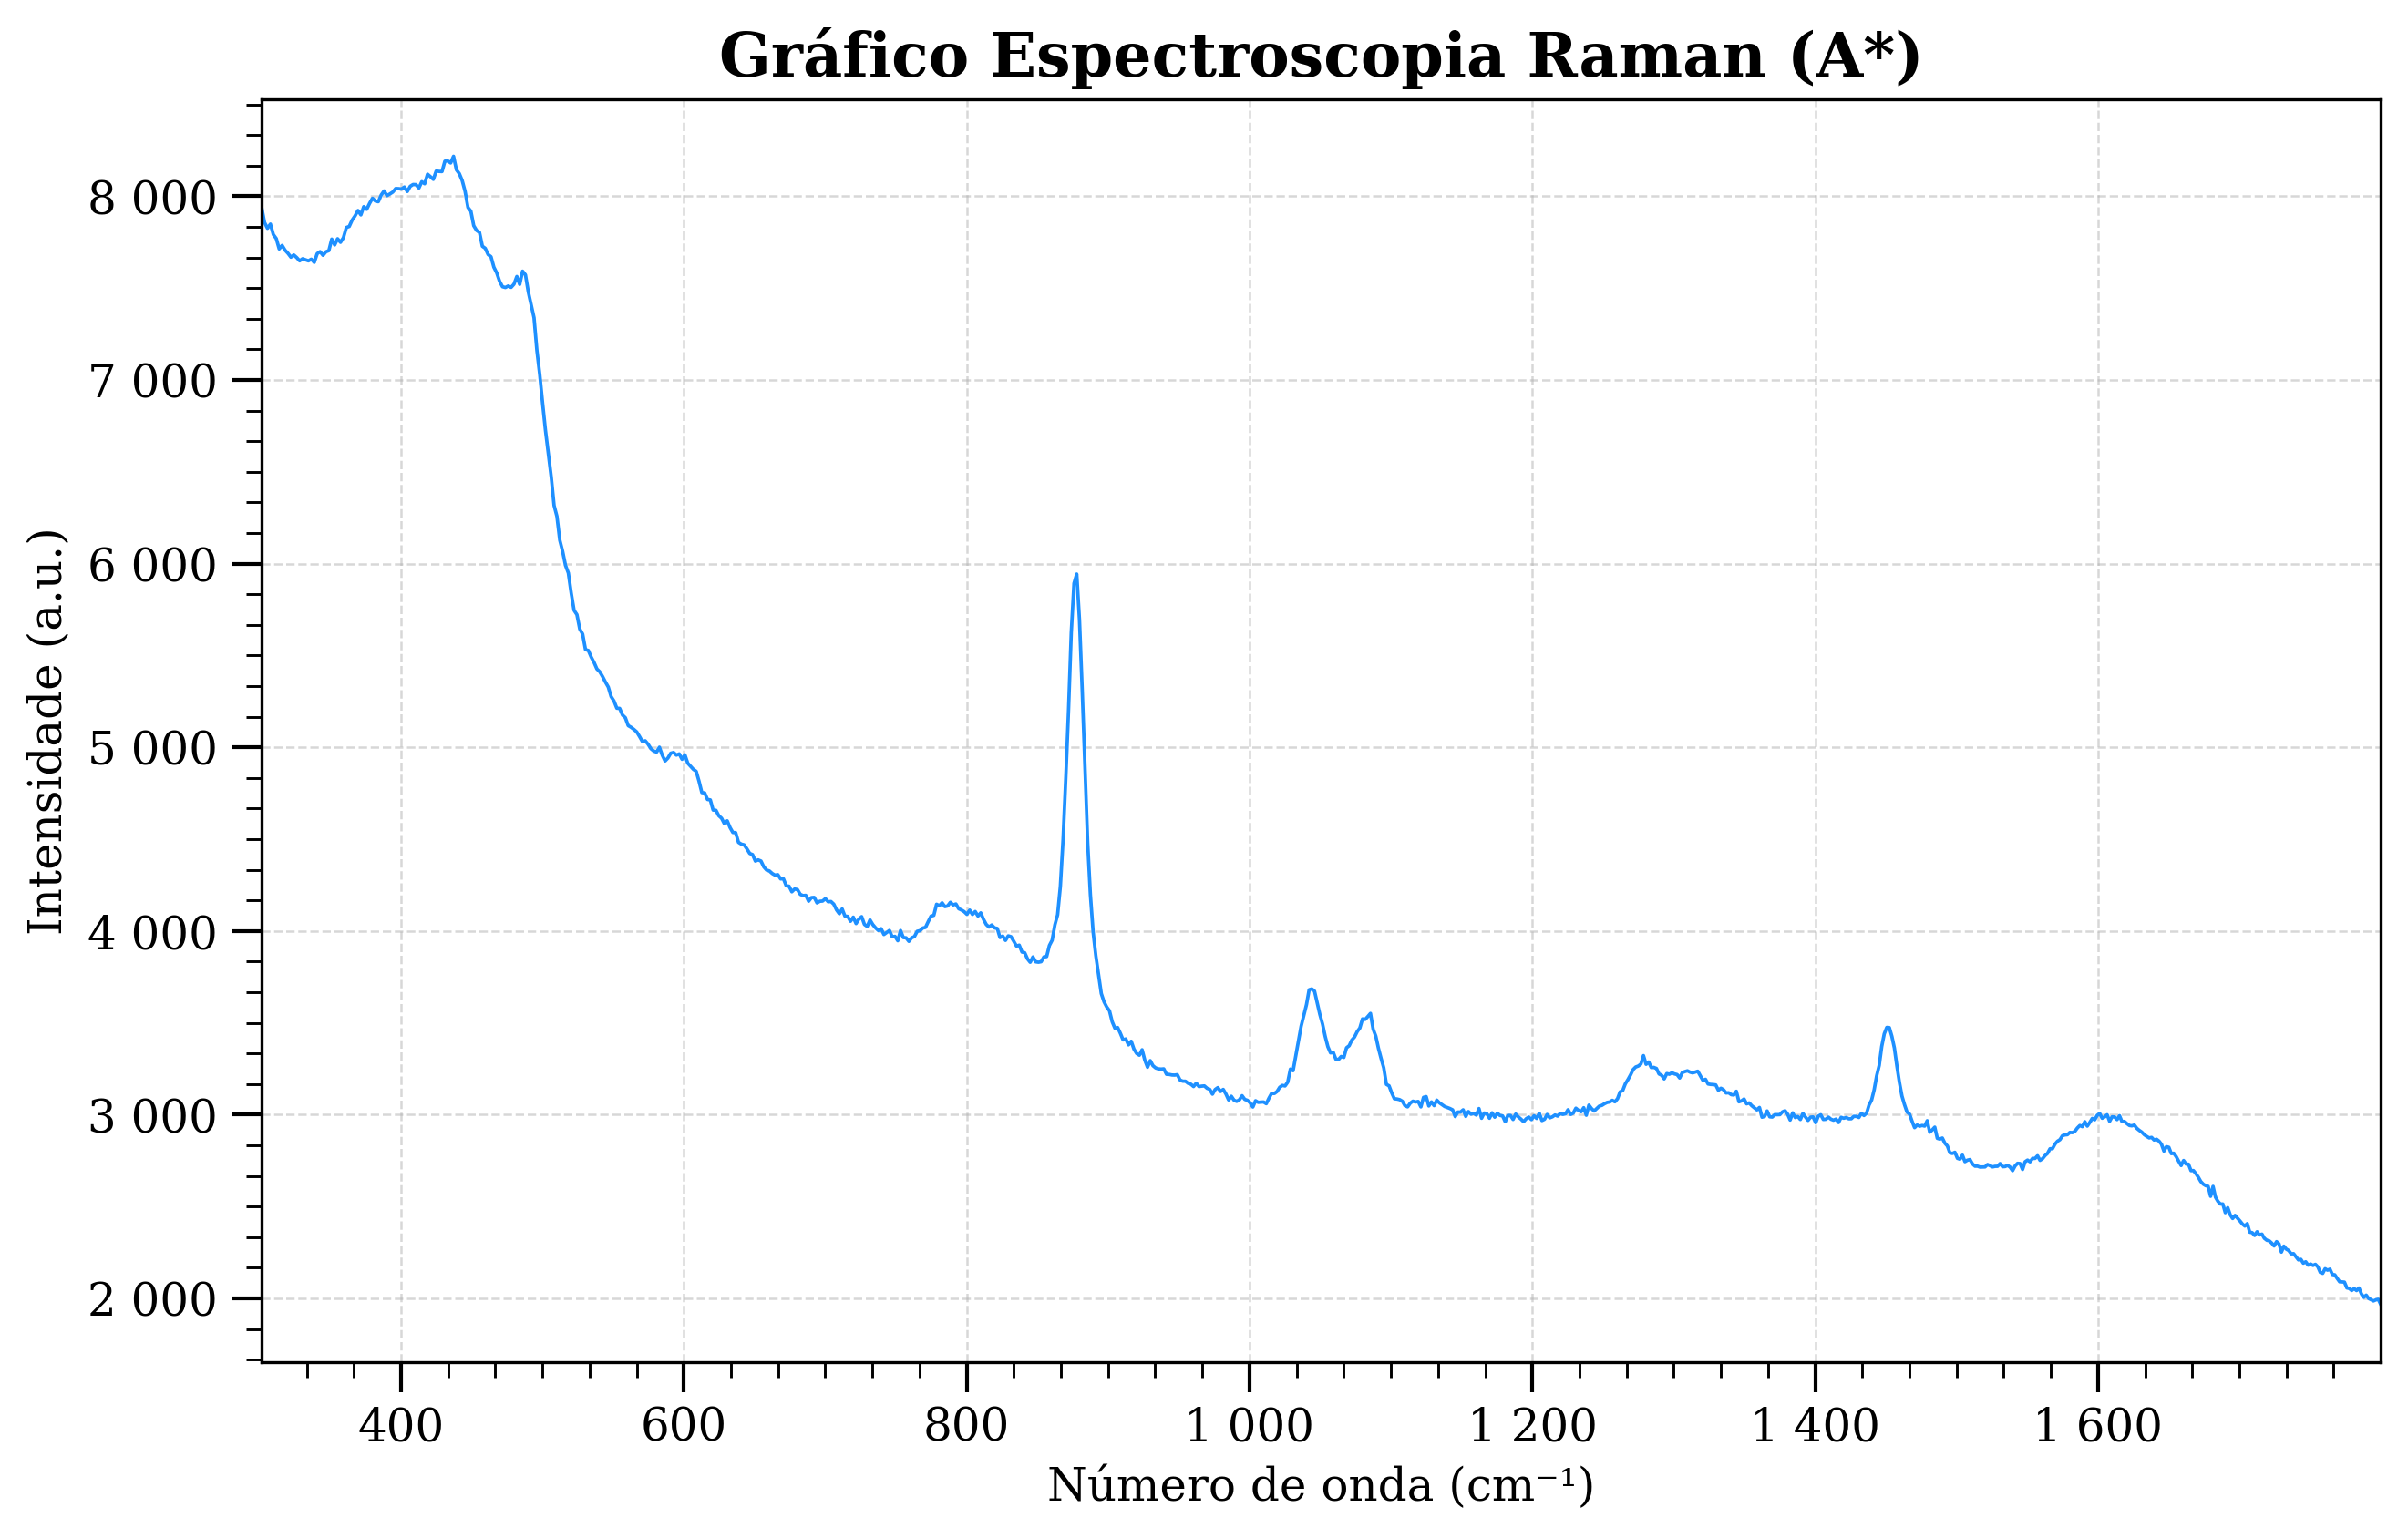

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.signal import savgol_filter
from scipy import sparse
from scipy.sparse.linalg import spsolve
from matplotlib import gridspec

plt.rcParams.update({
    "font.family": "serif",
    "mathtext.fontset": "cm",
    "font.size": 12 
})

def formatar_espaco(x, pos):
    return f"{x:,.0f}".replace(",", " ")

file_path = "dados/raman_A_.txt"

with open(file_path, "r", encoding="utf-8") as file:
    content = file.read()
    content = content.split()

X_wave_number_A = []
y_intensity_A = []

for i in range(len(content)):
    if i % 2 == 1:
        y_intensity_A.append(float(content[i]))
    else: 
        X_wave_number_A.append(float(content[i]))

X_wave_number_A = np.array(X_wave_number_A)
y_intensity_A = np.array(y_intensity_A)

INTERVALO = (300, 1800)
mask = (X_wave_number_A >= INTERVALO[0]) & (X_wave_number_A <= INTERVALO[1])

X_wave_number_A = X_wave_number_A[mask]
y_intensity_A = y_intensity_A[mask]


plt.figure(figsize=(10,6), dpi=300)
plt.plot(X_wave_number_A, y_intensity_A, color="dodgerblue", linewidth=0.9)
plt.xlabel("Número de onda (cm⁻¹)", fontsize=12)
plt.ylabel("Intensidade (a.u.)", fontsize=12)
plt.title("Gráfico Espectroscopia Raman (A*)", fontweight="bold", fontsize=16)
plt.xlim(min(X_wave_number_A), max(X_wave_number_A))
plt.grid(linestyle="--", linewidth=0.6, alpha=0.5)

ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(6))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(6))
ax.tick_params(axis="both", which="major", length=8, width=1)
ax.tick_params(axis="both", which="minor", length=4, width=0.7)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))

plt.show()

### **Corrigindo o baseline e Normalizando**

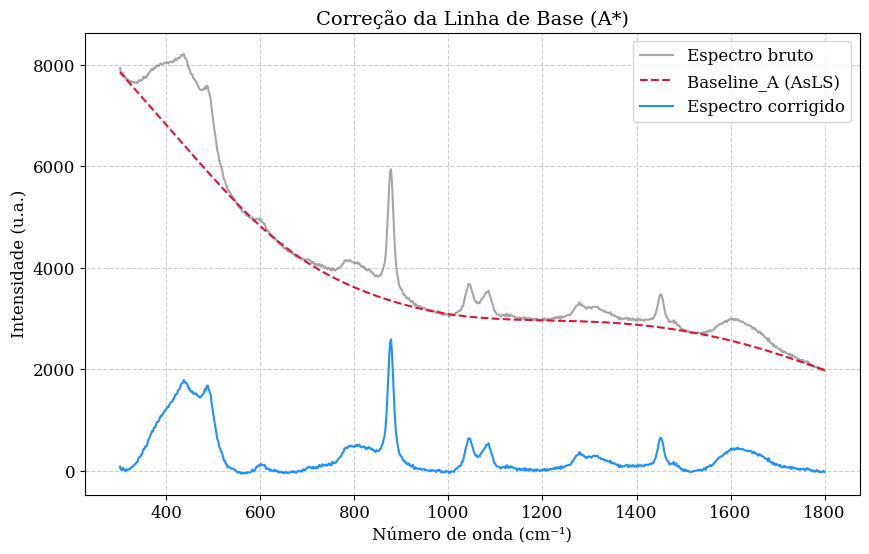

In [2]:
def asls_baseline_A(y, lam=1e6, p=0.01, niter=10):
    """
    Subtração de baseline_A usando Asymmetric Least Squares (AsLS)    
    y: vetor de intensidades
    lam: parâmetro de suavidade (10^5–10^8)
    p: assimetria (0.001–0.05)
    niter: número de iterações
    Retorna: vetor com baseline_A estimado
    """ 
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, 1, 2], shape=(L-2, L))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.T.dot(D)
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    return z

baseline_A = asls_baseline_A(y_intensity_A, lam=0.5e6, p=0.007)

y_intensity_A_corrigido = y_intensity_A - baseline_A

plt.figure(figsize=(10, 6))
plt.plot(X_wave_number_A, y_intensity_A, label="Espectro bruto", color="gray", alpha=0.7)
plt.plot(X_wave_number_A, baseline_A, label="Baseline_A (AsLS)", color="crimson", linestyle="--")
plt.plot(X_wave_number_A, y_intensity_A_corrigido, label="Espectro corrigido", color="dodgerblue")
plt.title("Correção da Linha de Base (A*)", fontsize=14)
plt.xlabel("Número de onda (cm⁻¹)", fontsize=12)
plt.ylabel("Intensidade (u.a.)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.show()

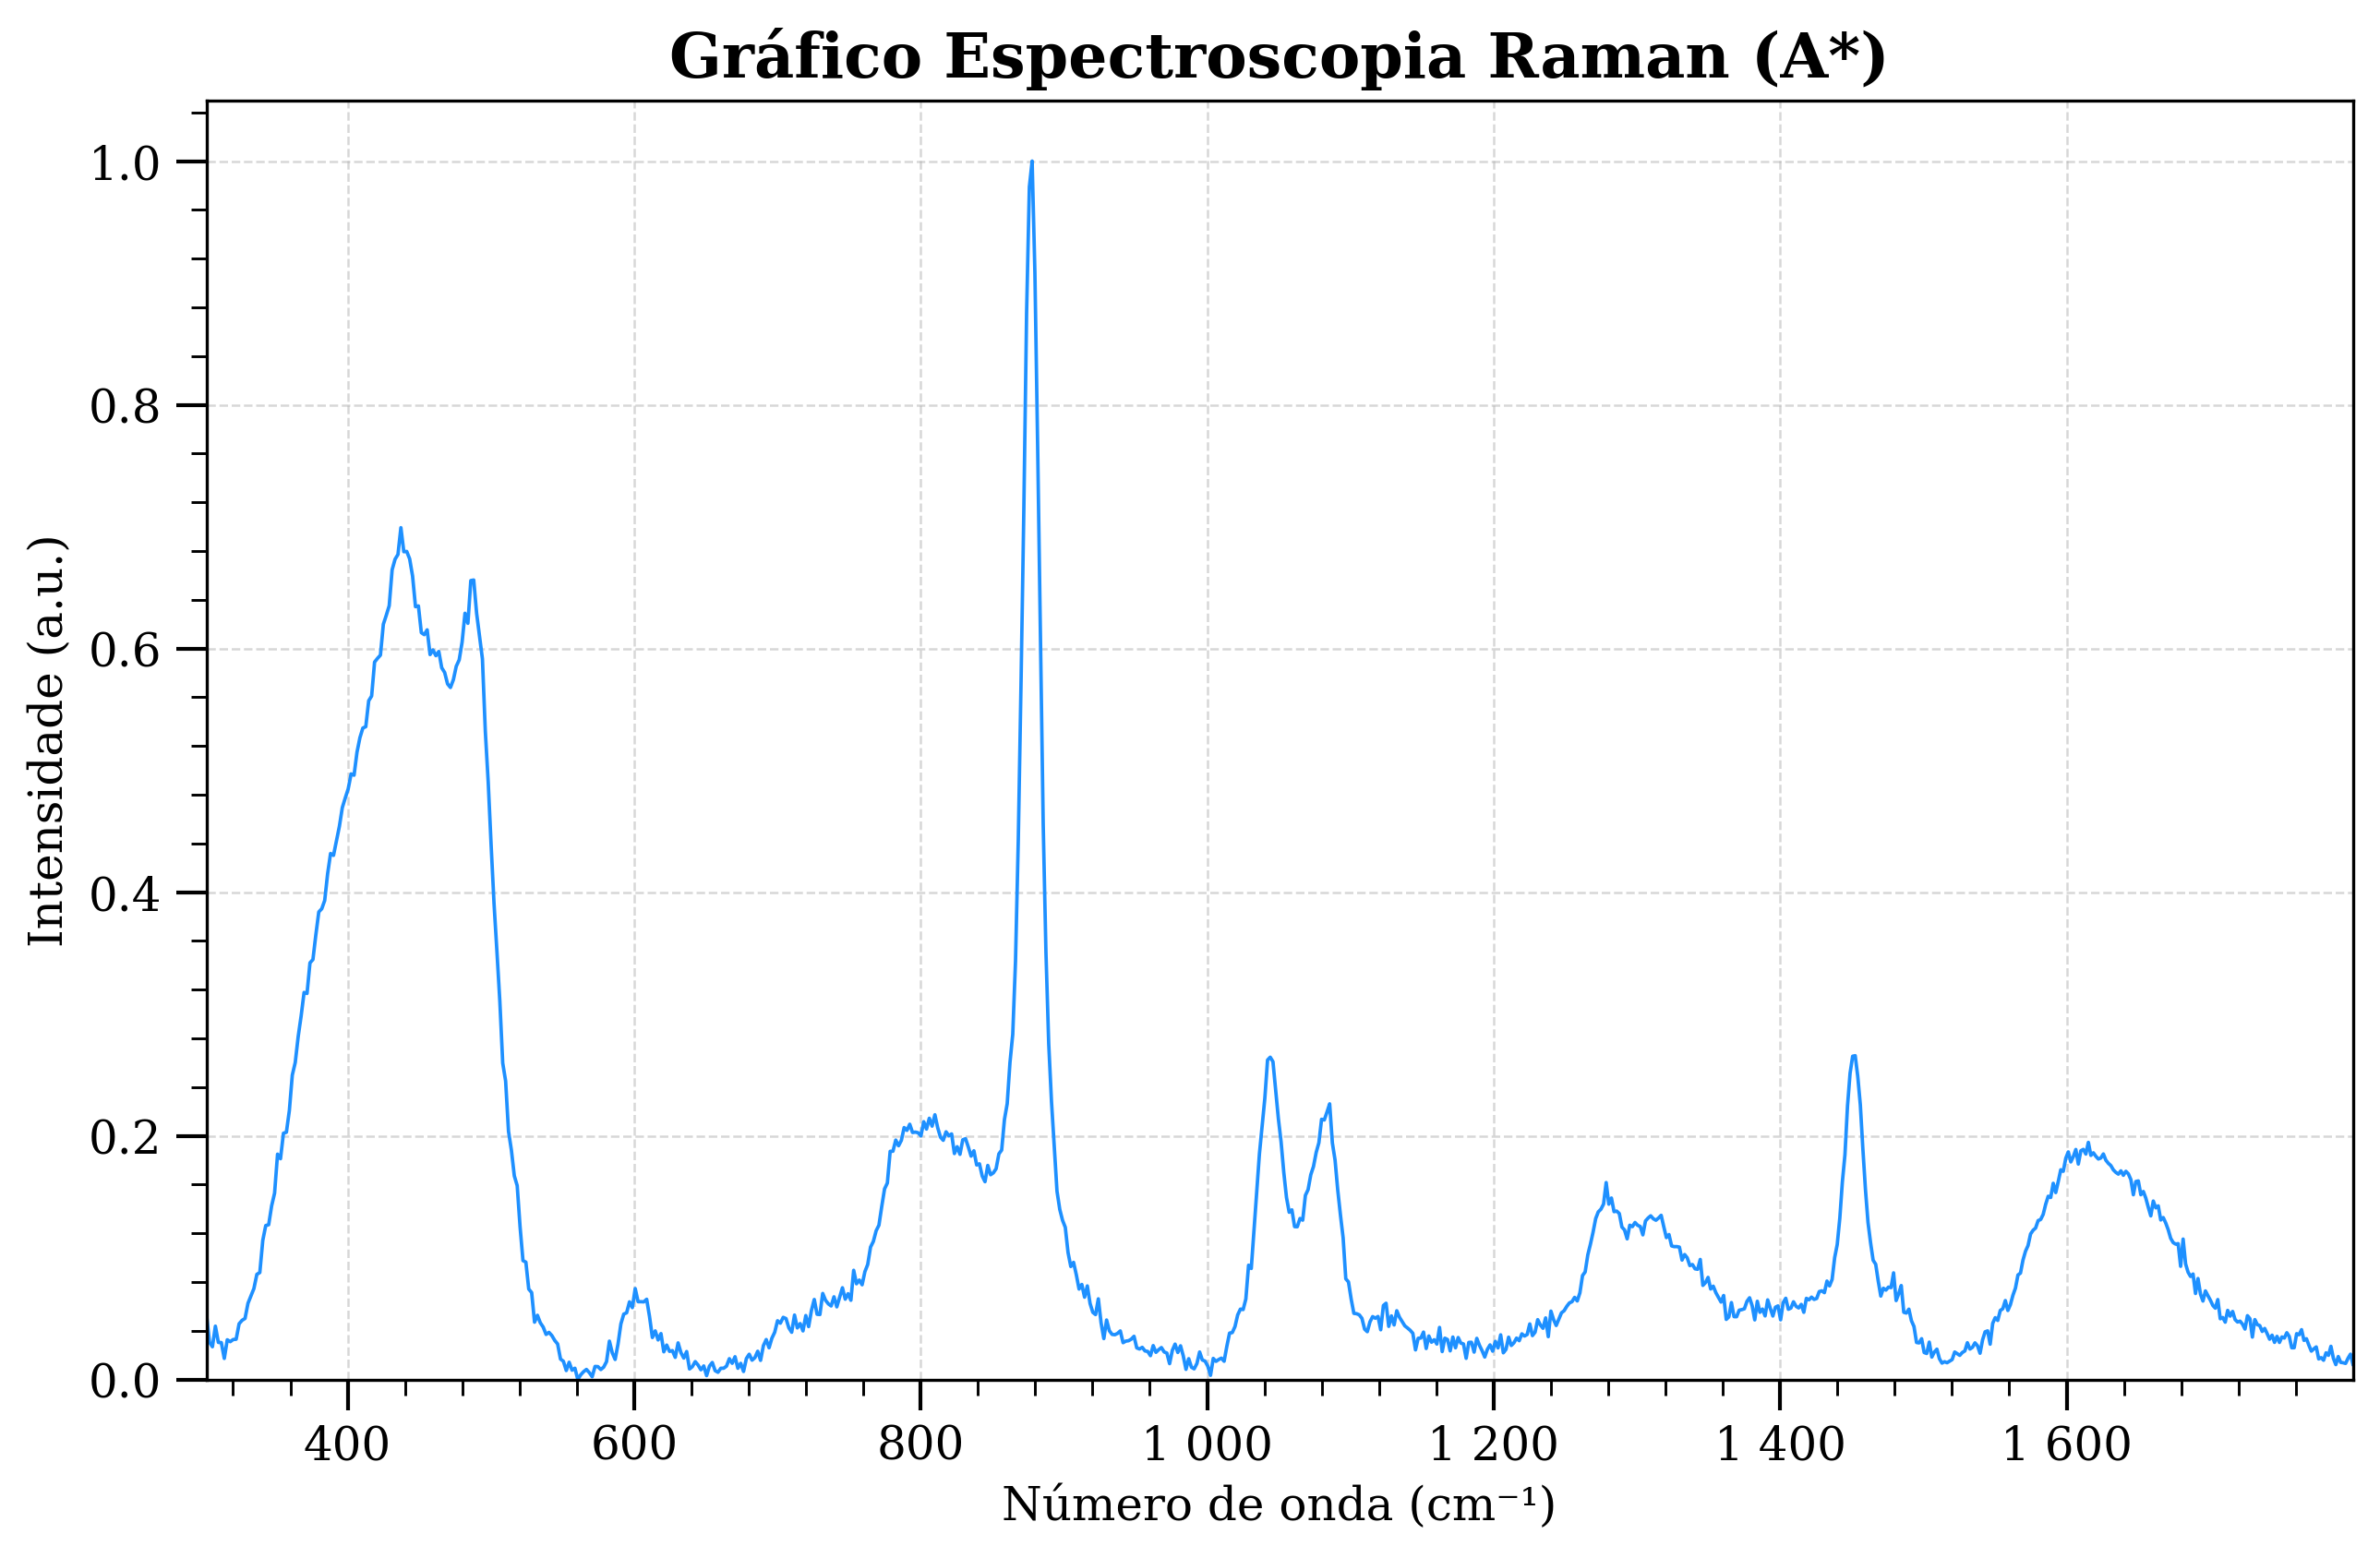

In [3]:
max_value_A = max(y_intensity_A_corrigido)
min_value_B = min(y_intensity_A_corrigido)
y_intensity_A_norm = [(v - min_value_B) / (max_value_A - min_value_B) for v in y_intensity_A_corrigido]

plt.figure(figsize=(10,6), dpi=300)
plt.plot(X_wave_number_A, y_intensity_A_norm, color="dodgerblue", linewidth=0.9)
plt.xlabel("Número de onda (cm⁻¹)", fontsize=12)
plt.ylabel("Intensidade (a.u.)", fontsize=12)
plt.title("Gráfico Espectroscopia Raman (A*)", fontweight="bold", fontsize=16)
plt.xlim(min(X_wave_number_A), max(X_wave_number_A))
plt.grid(linestyle="--", linewidth=0.6, alpha=0.5)

ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
ax.tick_params(axis="both", which="major", length=8, width=1)
ax.tick_params(axis="both", which="minor", length=4, width=0.7)
ax.set_ylim(bottom=0)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))

plt.show()

## **B\***

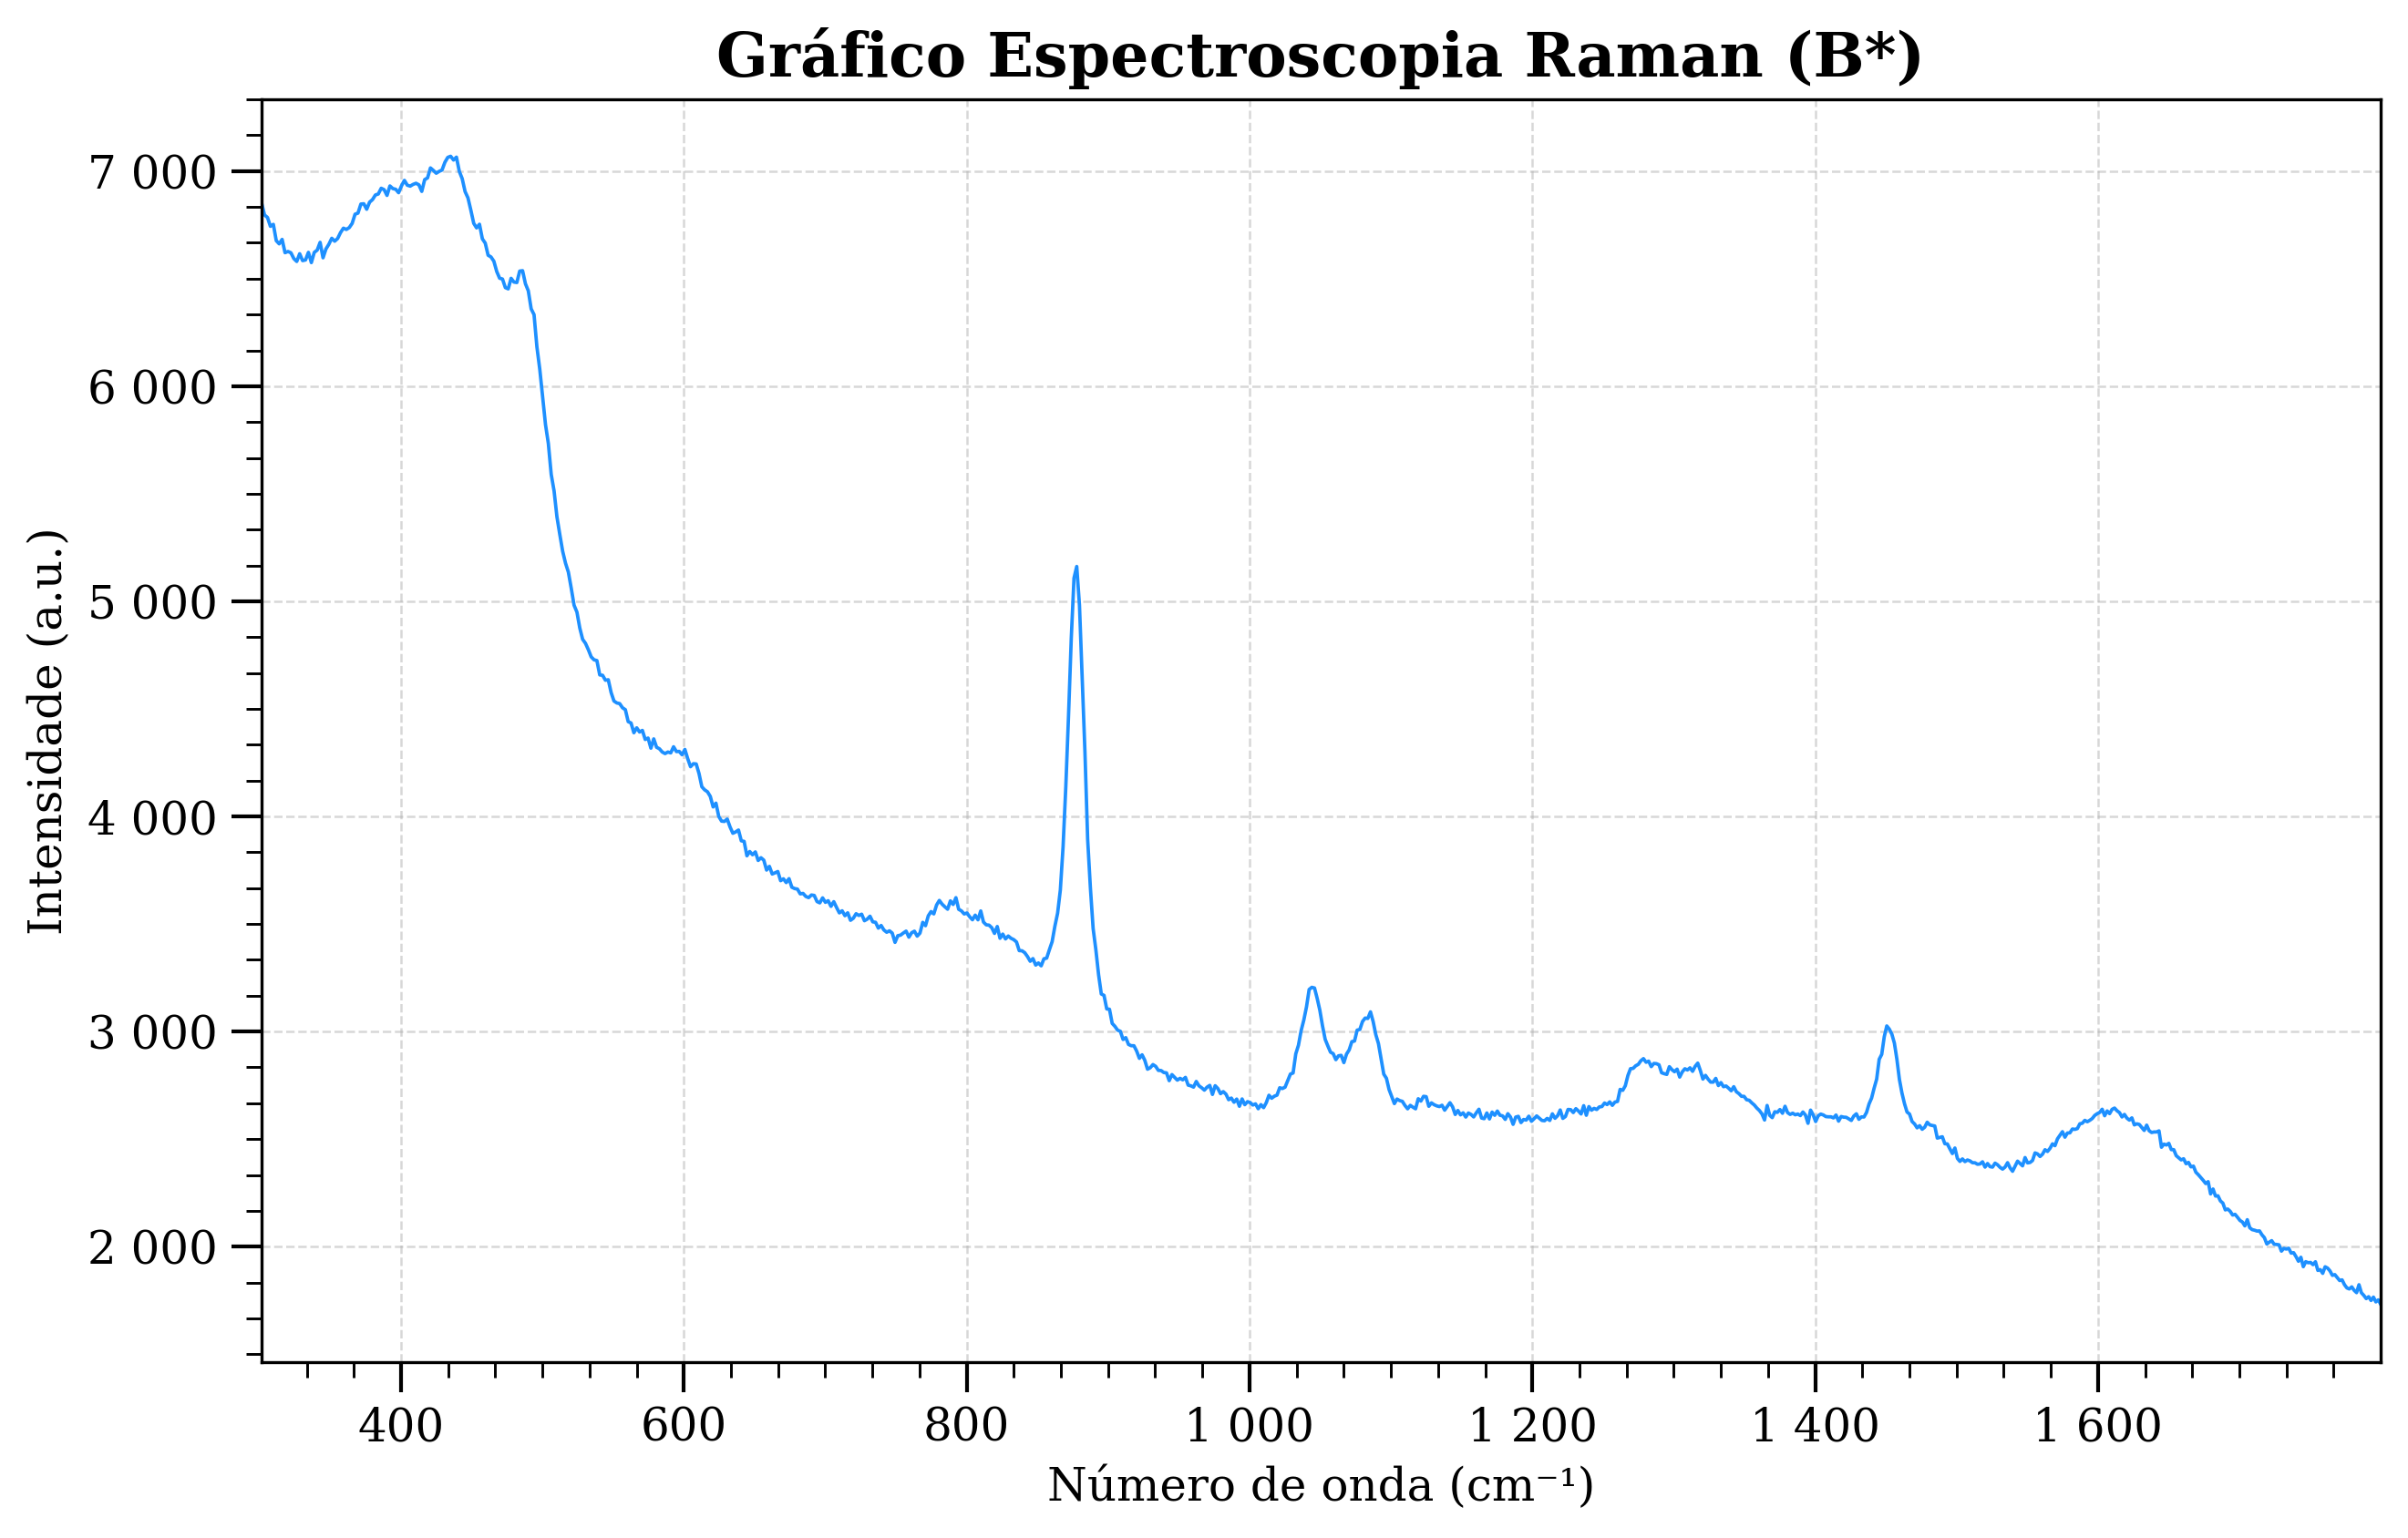

In [4]:
def formatar_espaco(x, pos):
    return f"{x:,.0f}".replace(",", " ")

file_path = "dados/raman_B_.txt"

with open(file_path, "r", encoding="utf-8") as file:
    content = file.read()
    content = content.split()

X_wave_number_B = []
y_intensity_B = []

for i in range(len(content)):
    if i % 2 == 1:
        y_intensity_B.append(float(content[i]))
    else: 
        X_wave_number_B.append(float(content[i]))

X_wave_number_B = np.array(X_wave_number_B)
y_intensity_B = np.array(y_intensity_B)

INTERVALO = (300, 1800)
mask = (X_wave_number_B >= INTERVALO[0]) & (X_wave_number_B <= INTERVALO[1])

X_wave_number_B = X_wave_number_B[mask]
y_intensity_B = y_intensity_B[mask]


plt.figure(figsize=(10,6), dpi=300)
plt.plot(X_wave_number_B, y_intensity_B, color="dodgerblue", linewidth=0.9)
plt.xlabel("Número de onda (cm⁻¹)", fontsize=12)
plt.ylabel("Intensidade (a.u.)", fontsize=12)
plt.title("Gráfico Espectroscopia Raman (B*)", fontweight="bold", fontsize=16)
plt.xlim(min(X_wave_number_B), max(X_wave_number_B))
plt.grid(linestyle="--", linewidth=0.6, alpha=0.5)

ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(6))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(6))
ax.tick_params(axis="both", which="major", length=8, width=1)
ax.tick_params(axis="both", which="minor", length=4, width=0.7)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))

plt.show()

### **Corrigindo o baseline e Normalizando**

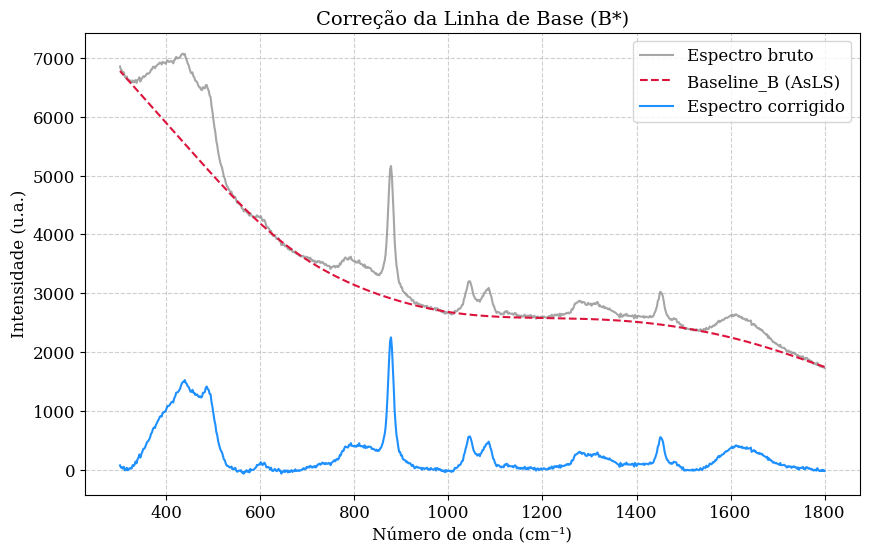

In [5]:
def asls_baseline_B(y, lam=1e6, p=0.01, niter=10):
    """
    Subtração de baseline_B usando Asymmetric Least Squares (AsLS)    
    y: vetor de intensidades
    lam: parâmetro de suavidade (10^5–10^8)
    p: assimetria (0.001–0.05)
    niter: número de iterações
    Retorna: vetor com baseline_B estimado
    """ 
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, 1, 2], shape=(L-2, L))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.T.dot(D)
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    return z

baseline_B = asls_baseline_B(y_intensity_B, lam=0.5e6, p=0.007)

y_intensity_B_corrigido = y_intensity_B - baseline_B

plt.figure(figsize=(10, 6))
plt.plot(X_wave_number_B, y_intensity_B, label="Espectro bruto", color="gray", alpha=0.7)
plt.plot(X_wave_number_B, baseline_B, label="Baseline_B (AsLS)", color="crimson", linestyle="--")
plt.plot(X_wave_number_B, y_intensity_B_corrigido, label="Espectro corrigido", color="dodgerblue")
plt.title("Correção da Linha de Base (B*)", fontsize=14)
plt.xlabel("Número de onda (cm⁻¹)", fontsize=12)
plt.ylabel("Intensidade (u.a.)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()

plt.show()

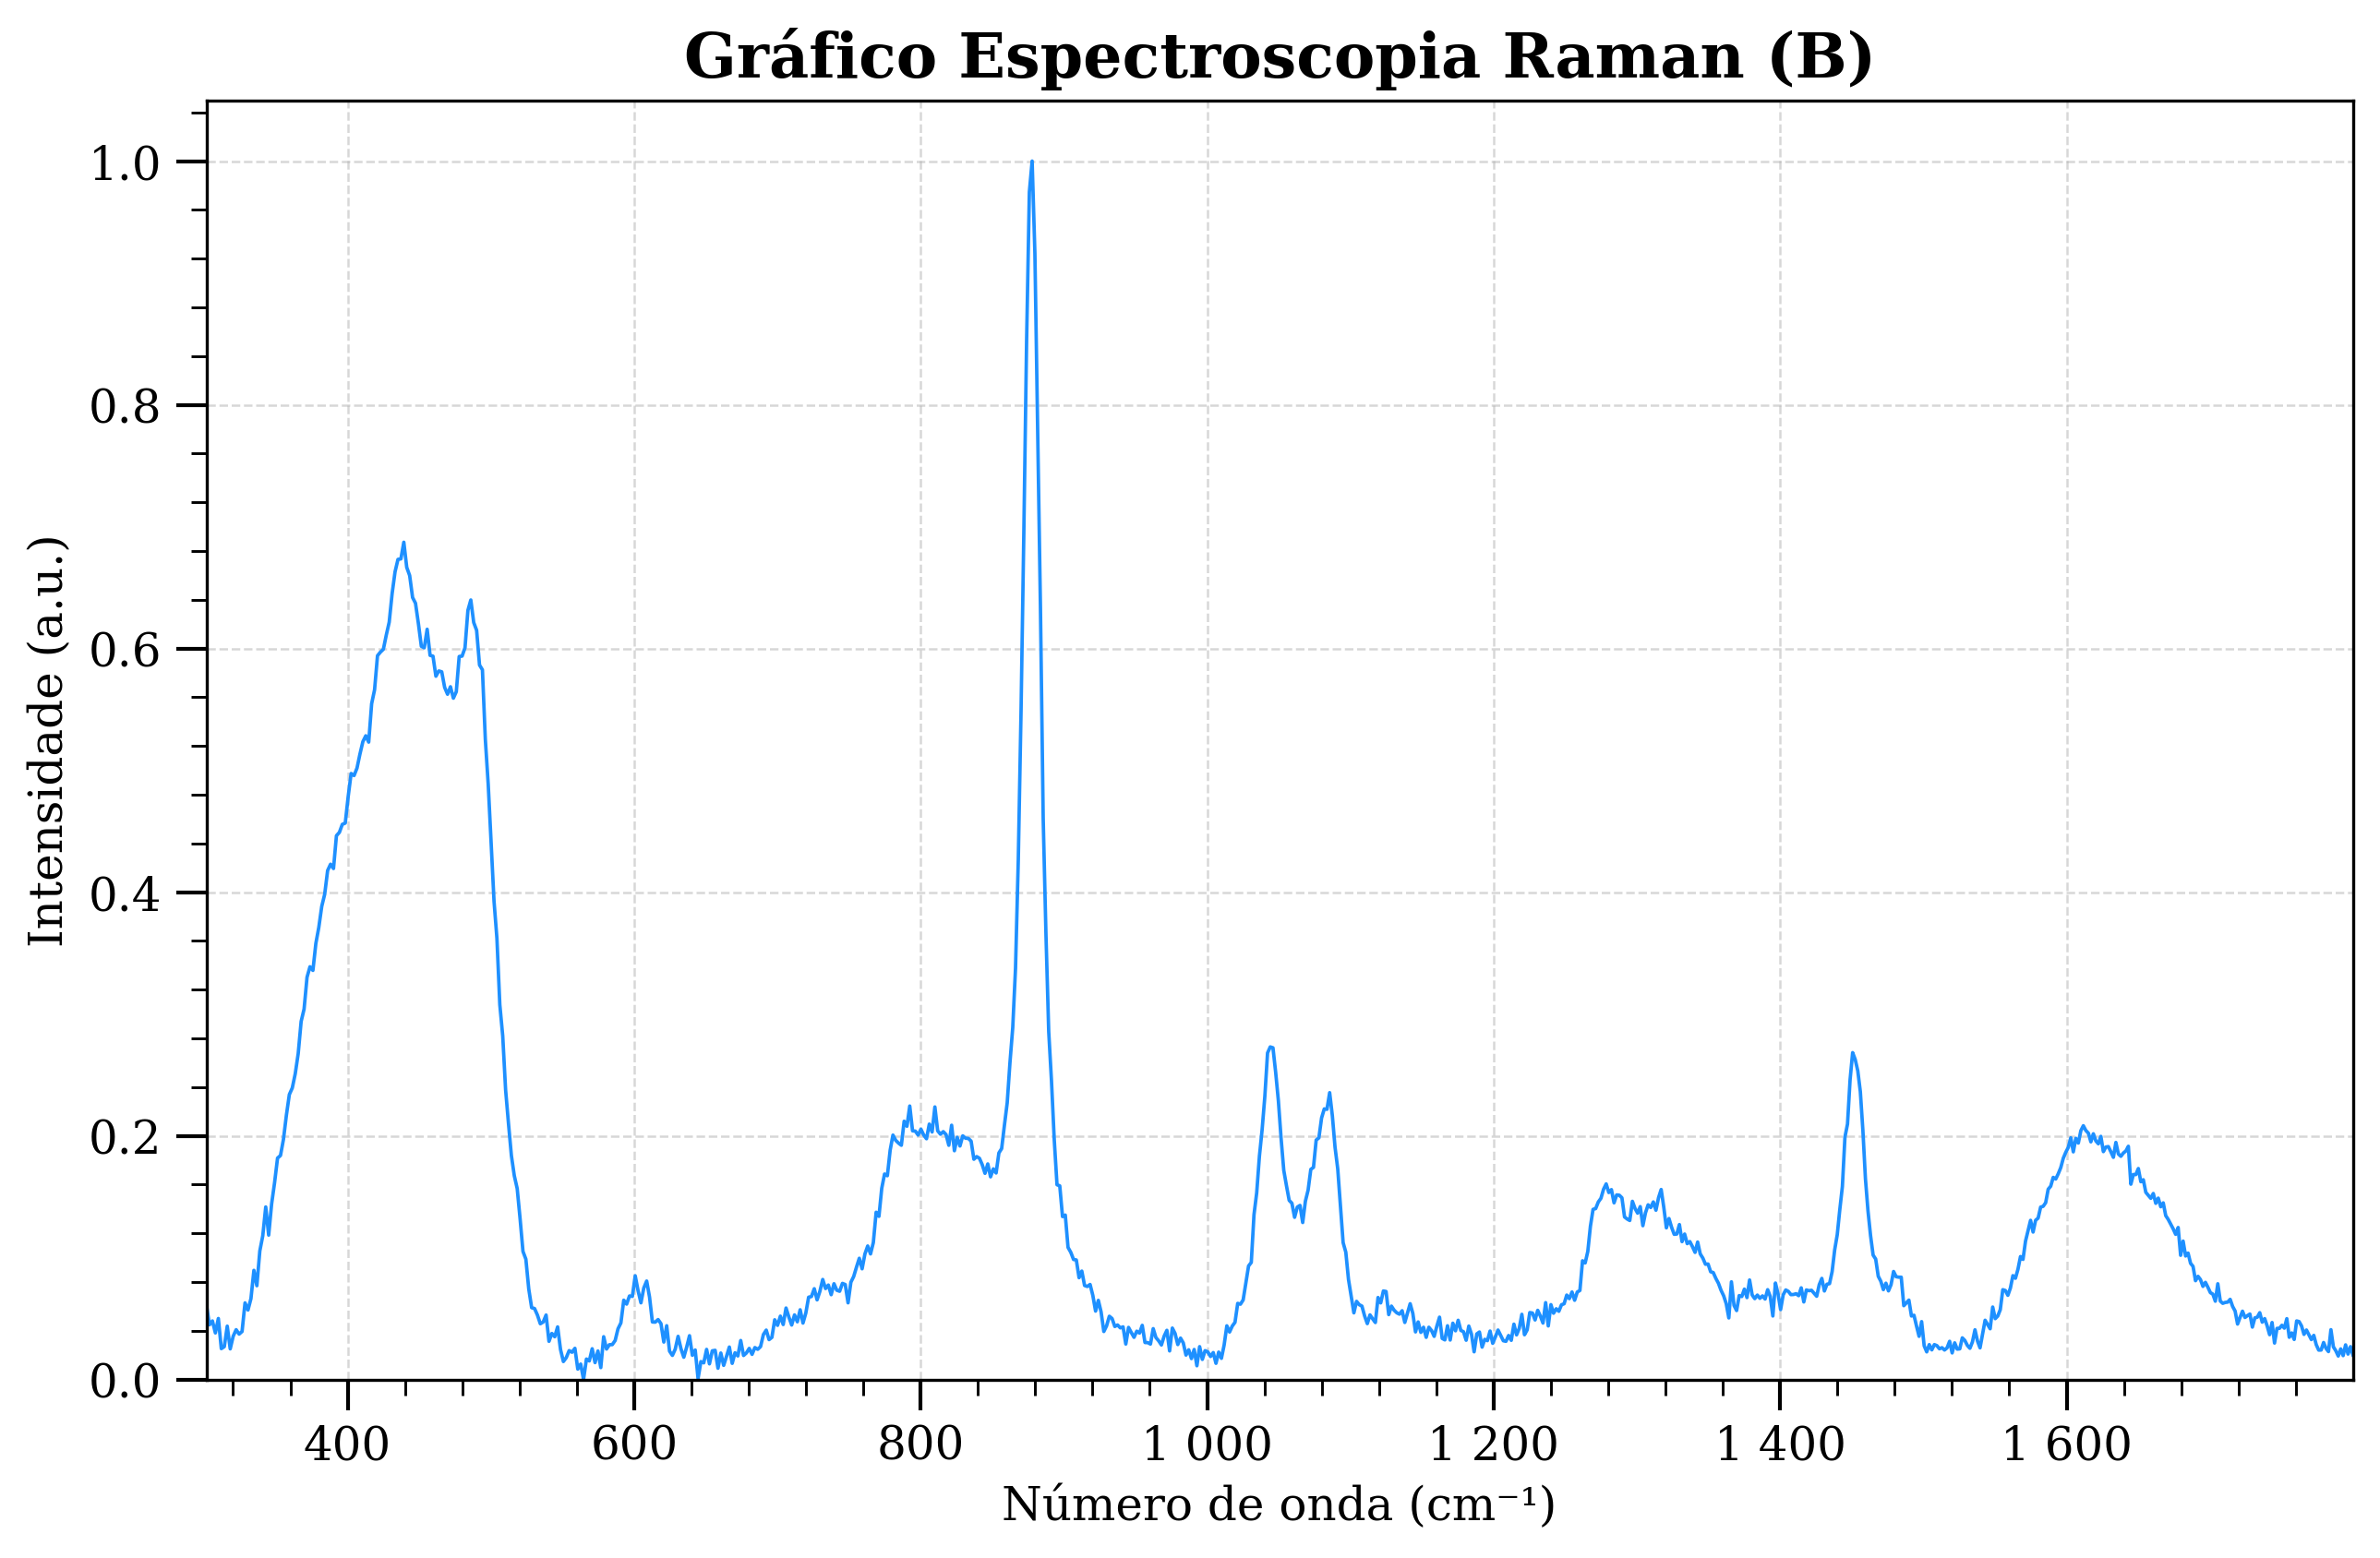

In [6]:
max_value_B = max(y_intensity_B_corrigido)
min_value_B = min(y_intensity_B_corrigido)
y_intensity_B_norm = [(v - min_value_B) / (max_value_B - min_value_B) for v in y_intensity_B_corrigido]

plt.figure(figsize=(10,6), dpi=300)
plt.plot(X_wave_number_B, y_intensity_B_norm, color="dodgerblue", linewidth=0.9)
plt.xlabel("Número de onda (cm⁻¹)", fontsize=12)
plt.ylabel("Intensidade (a.u.)", fontsize=12)
plt.title("Gráfico Espectroscopia Raman (B)", fontweight="bold", fontsize=16)
plt.xlim(min(X_wave_number_B), max(X_wave_number_B))
plt.grid(linestyle="--", linewidth=0.6, alpha=0.5)

ax = plt.gca()
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(5))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(5))
ax.tick_params(axis="both", which="major", length=8, width=1)
ax.tick_params(axis="both", which="minor", length=4, width=0.7)
ax.set_ylim(bottom=0)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_espaco))

plt.show()

## **Juntando Tudo 😎🧃**

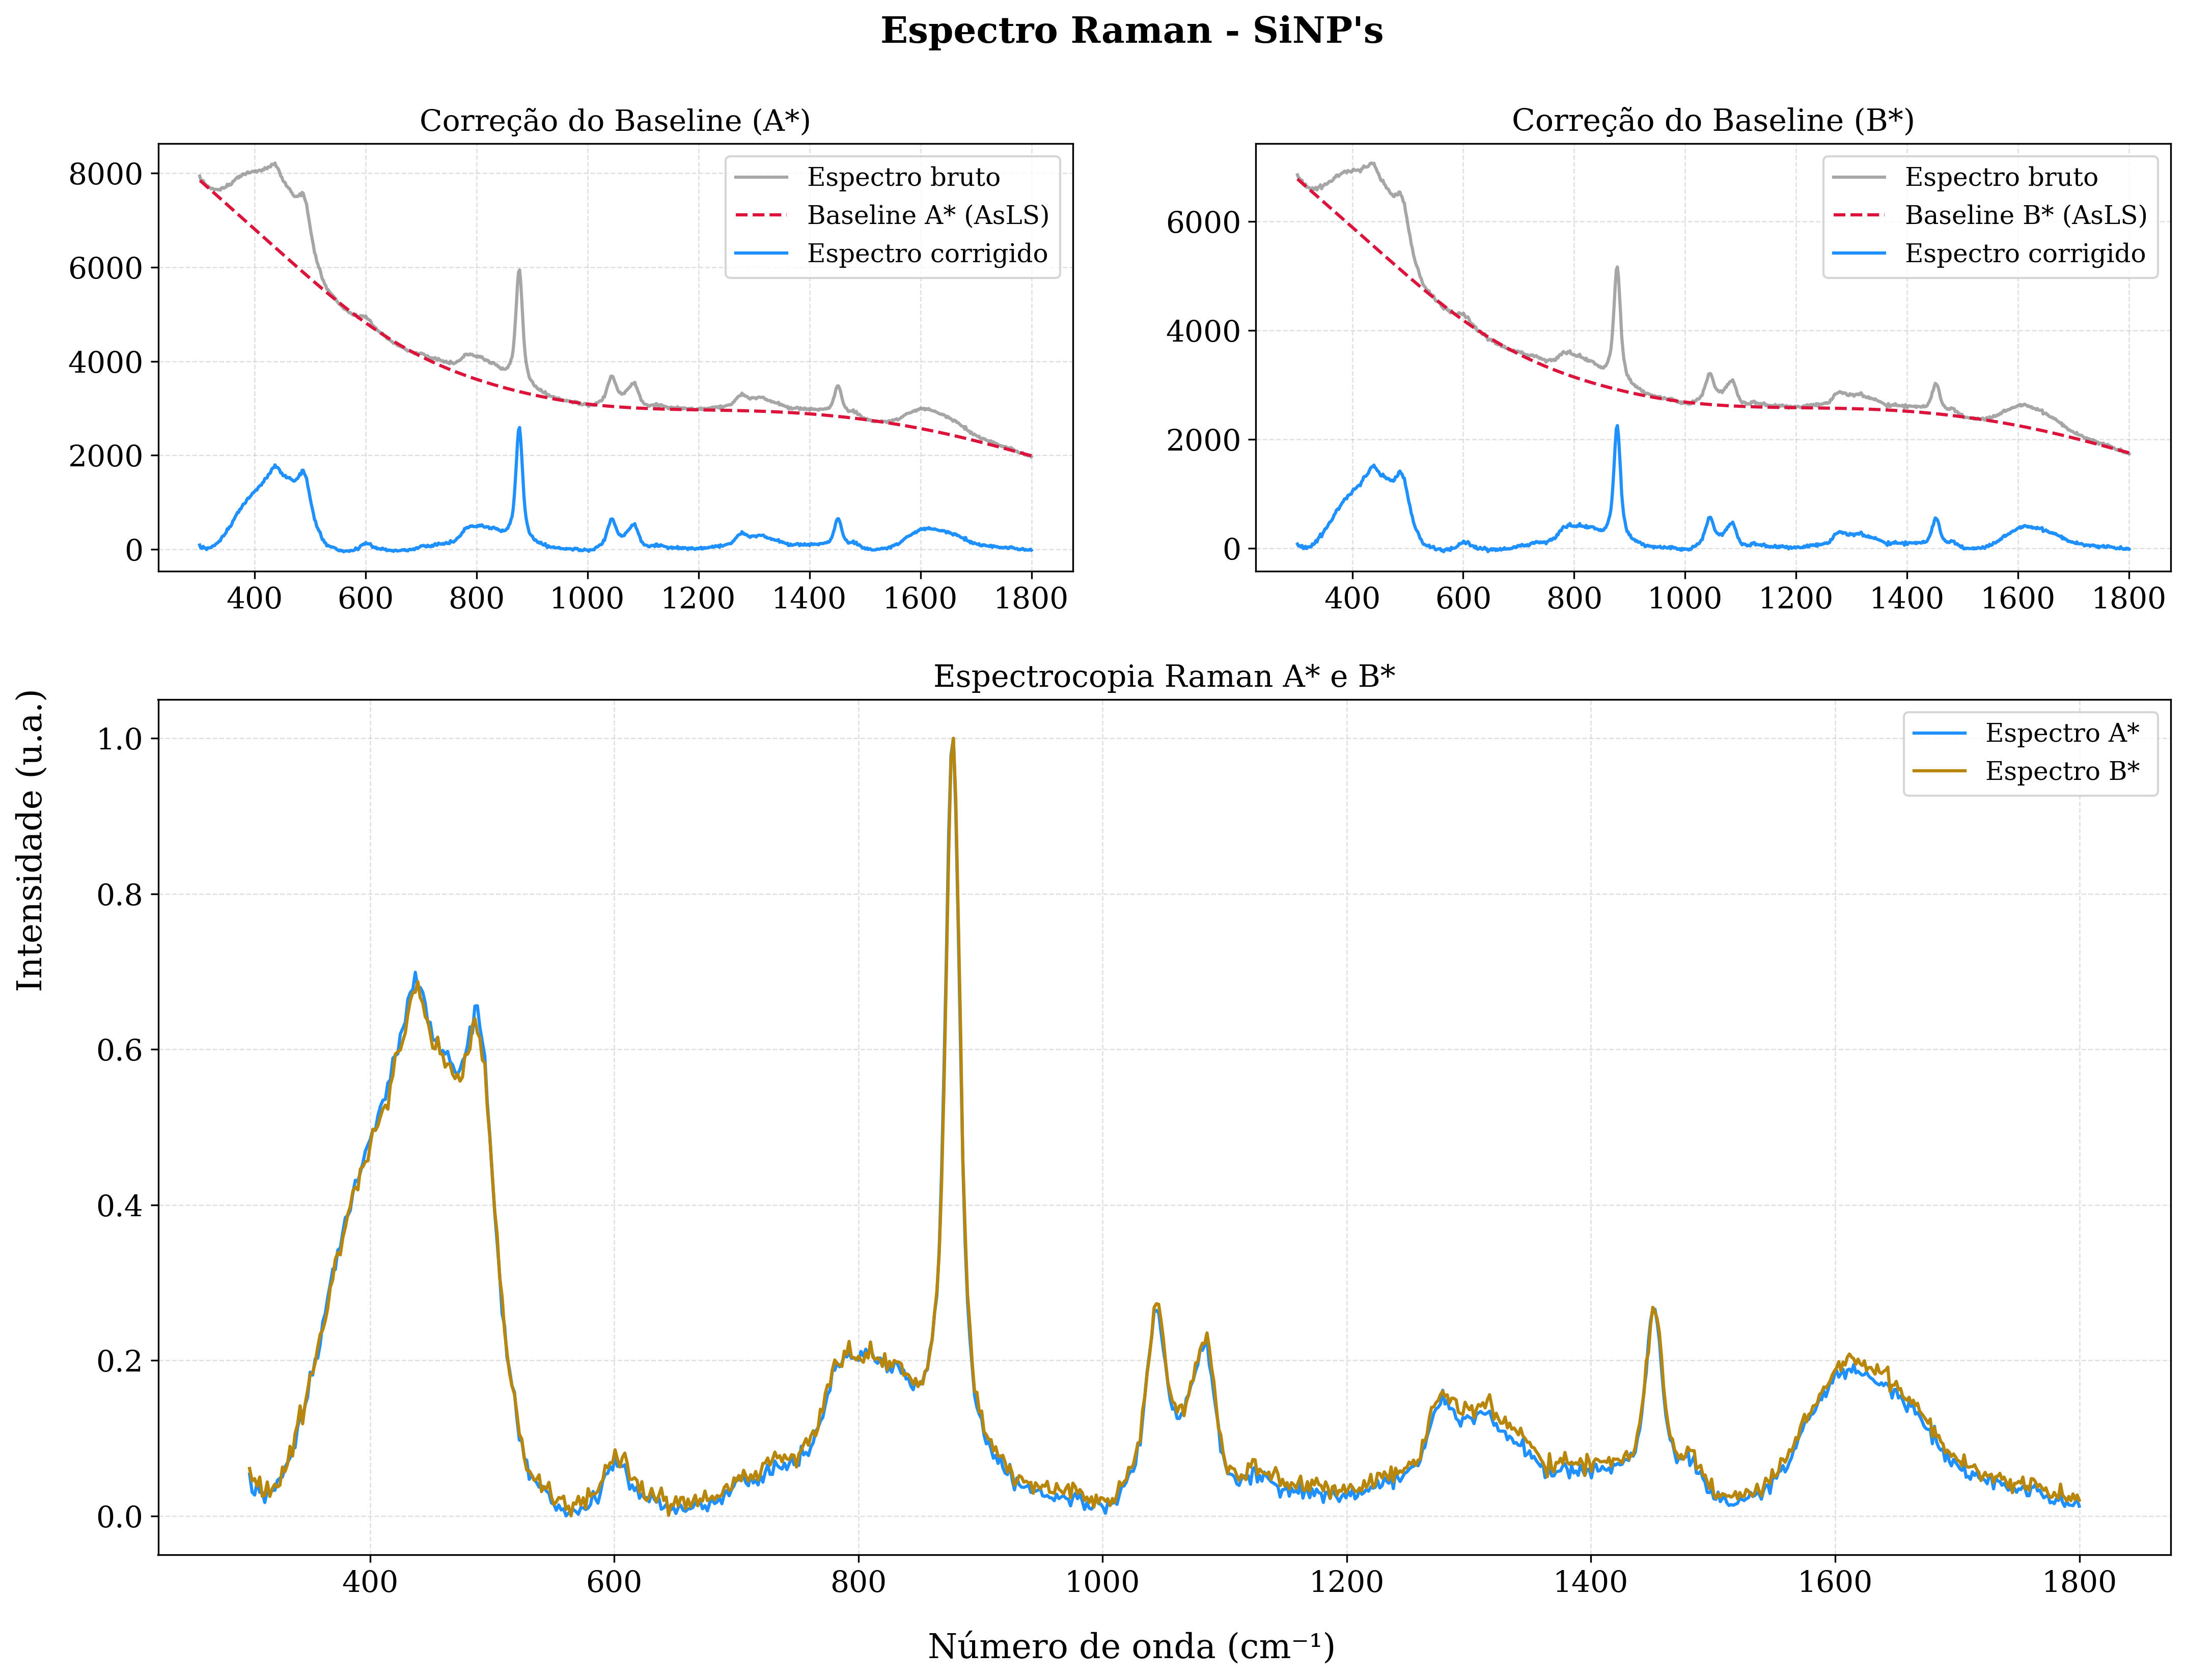

In [7]:


fig = plt.figure(figsize=(17, 12), dpi=300)
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[0.5, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(X_wave_number_A, y_intensity_A, label="Espectro bruto", color="gray", alpha=0.7)
ax1.plot(X_wave_number_A, baseline_A, label="Baseline A* (AsLS)", color="crimson", linestyle="--")
ax1.plot(X_wave_number_A, y_intensity_A_corrigido, label="Espectro corrigido", color="dodgerblue")
ax1.set_title("Correção do Baseline (A*)", fontsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
# ax1.set_ylabel("Intensidade (u.a.)", fontsize=12)
# ax1.set_xlabel("Número de onda (cm⁻¹)", fontsize=12)
ax1.grid(True, linestyle="--", alpha=0.4, linewidth=0.6)
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(X_wave_number_B, y_intensity_B, label="Espectro bruto", color="gray", alpha=0.7)
ax2.plot(X_wave_number_B, baseline_B, label="Baseline B* (AsLS)", color="crimson", linestyle="--")
ax2.plot(X_wave_number_B, y_intensity_B_corrigido, label="Espectro corrigido", color="dodgerblue")
ax2.grid(linestyle="--", linewidth=0.6, alpha=0.4)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
# ax2.set_ylabel("Intensidade (u.a.)", fontsize=12)
# ax2.set_xlabel("Número de onda (cm⁻¹)", fontsize=12)
ax2.set_title("Correção do Baseline (B*)")
ax2.legend()

ax3 = fig.add_subplot(gs[1, :])
ax3.plot(X_wave_number_A, y_intensity_A_norm, color="dodgerblue", label="Espectro A*")
ax3.plot(X_wave_number_B, y_intensity_B_norm, color="darkgoldenrod", label="Espectro B* ")
ax3.grid(linestyle="--", linewidth=0.6, alpha=0.4)
ax3.set_title("Espectrocopia Raman A* e B*")
ax3.tick_params(axis='x', labelsize=14)
ax3.tick_params(axis='y', labelsize=14)
# ax3.set_ylabel("Intensidade (u.a.)", fontsize=15)
# ax3.set_xlabel("Número de onda (cm⁻¹)", fontsize=15)
ax3.legend()


fig.supxlabel("Número de onda (cm⁻¹)", fontsize=16, y=0.05)
fig.supylabel("Intensidade (u.a.)", fontsize=16, x=0.07)

fig.suptitle("Espectro Raman - SiNP's", fontsize=17, weight="bold", y=0.95)

plt.show()
